In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_path = 'flipkart.csv'  # Adjust path if necessary
data = pd.read_csv(data_path)


In [ ]:
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

In [ ]:
data['Sentiment'] = data['Rating'].apply(lambda x: 1 if x >= 3 else 0)

In [ ]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Cleaned_Review']).toarray()
y = data['Sentiment']  # Target variable (0 = Negative, 1 = Positive)

Available columns: Index(['Unnamed: 0', 'Product_name', 'Review', 'Rating', 'Cleaned_Review'], dtype='object')


In [ ]:
data['Cleaned_Review'] = data['Review'].apply(preprocess_text)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Cleaned_Review']).toarray()
y = data['Sentiment']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_rep)

Accuracy: 93.71%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.35      0.51        43
           1       0.94      1.00      0.97       418

    accuracy                           0.94       461
   macro avg       0.94      0.67      0.74       461
weighted avg       0.94      0.94      0.92       461



In [ ]:
positive_reviews = ' '.join(data[data['Sentiment'] == 1]['Cleaned_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

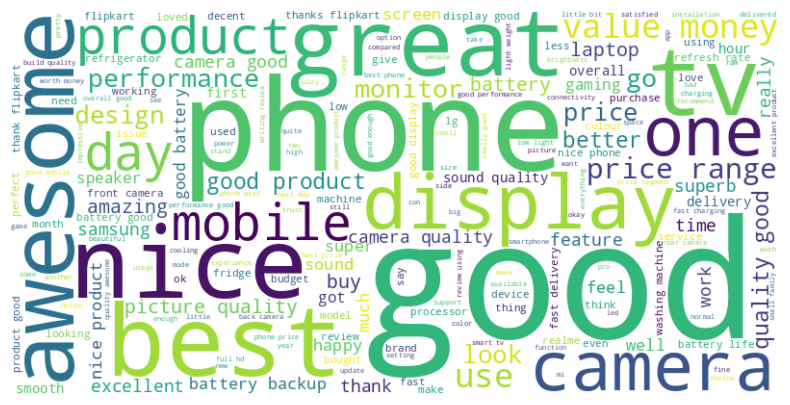

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def get_emoji_label(rating):
    if rating >= 4:
        return '😊'  # Happy
    elif rating == 3:
        return '😐'  # Neutral
    elif rating == 2:
        return '😕'  # Disappointed
    else:
        return '😡'  # Angry or very sad

In [ ]:
data['Emoji'] = data['Rating'].apply(get_emoji_label)

# Count Reviews for Each Emoji
emoji_counts = data['Emoji'].value_counts()


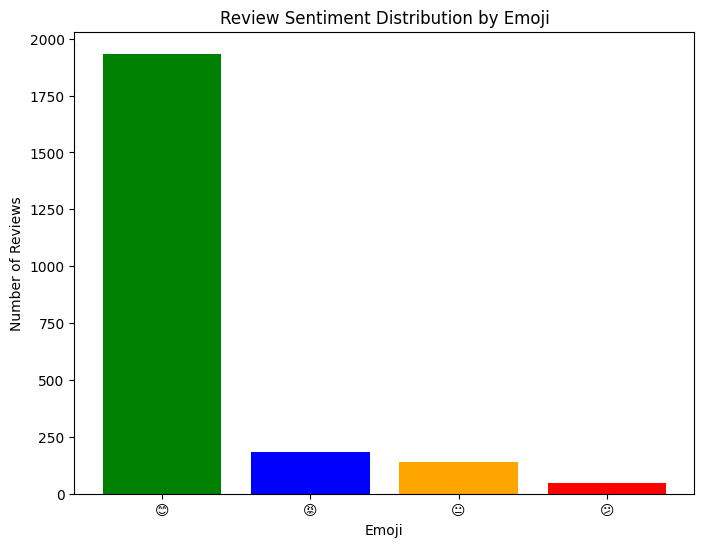

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(emoji_counts.index, emoji_counts.values, color=['green', 'blue', 'orange', 'red'])
plt.xlabel('Emoji')
plt.ylabel('Number of Reviews')
plt.title('Review Sentiment Distribution by Emoji')
plt.show()